In [80]:
# Importação de bibliotecas e módulos para resolução de exercícios

import cobra
from cobra.io import read_sbml_model
from cobra.flux_analysis import flux_variability_analysis
from cobra.flux_analysis import production_envelope

from mewpy.simulation import get_simulator
from mewpy.omics import ExpressionSet
from mewpy.omics import eFlux  

import pandas as pd




In [64]:
# Carregamos o modelo usando 

model = modelo_base = read_sbml_model('iRC1080_lv3.xml')
modelo_base

Name,iRC1080
Memory address,1e732383a58
Number of metabolites,1706
Number of reactions,2191
Number of genes,1086
Number of groups,0
Objective expression,1.0*BIOMASS_Chlamy_hetero - 1.0*BIOMASS_Chlamy_hetero_reverse_b1c3b
Compartments,"cytosol, mitochondria, chloroplast, flagellum, peroxisome/glyoxysome, nucleus, golgi apparatus, extracellular space, eyespot, thylakoid"


In [6]:
model.medium

{'EX_no3_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_h_e': 10.0,
 'EX_h2o_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_na1_e': 10.0,
 'EX_photonVis_e': 2000.0,
 'EX_o2_e': 10.0,
 'EX_co2_e': 11.16,
 'EX_ac_e': 10.0}

## a)

### Aerobic autotrophic

In [7]:
model_aero_auto_a = model.copy()

In [8]:
model_aero_auto_a.objective = "BIOMASS_Chlamy_auto"

In [9]:
model_aero_auto_a.reactions.get_by_id("EX_ac_e").lower_bound = 0

model_aero_auto_a.reactions.get_by_id("SK_starch300_h").lower_bound = 0

In [10]:
model_aero_auto_a.medium

{'EX_no3_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_h_e': 10.0,
 'EX_h2o_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_na1_e': 10.0,
 'EX_photonVis_e': 2000.0,
 'EX_o2_e': 10.0,
 'EX_co2_e': 11.16}

In [11]:
model_aero_auto_a.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,6.053,1,100.00%
h2o_e,EX_h2o_e,4.504,0,0.00%
mg2_e,EX_mg2_e,0.004208,0,0.00%
na1_e,EX_na1_e,1.205,0,0.00%
nh4_e,EX_nh4_e,0.5133,0,0.00%
no3_e,EX_no3_e,0.07161,0,0.00%
o2_e,EX_o2_e,1.77,0,0.00%
photonVis_e,EX_photonVis_e,1401,0,0.00%
pi_e,EX_pi_e,0.1628,0,0.00%
so4_e,EX_so4_e,0.003041,0,0.00%


### Microaerobic autotrophic

In [12]:
model_microaero_auto_a = model.copy()

In [13]:
model_microaero_auto_a.objective = "BIOMASS_Chlamy_auto"

In [14]:
model_microaero_auto_a.reactions.get_by_id("EX_o2_e").lower_bound = -0.01

model_microaero_auto_a.reactions.get_by_id("EX_ac_e").lower_bound = 0

model_microaero_auto_a.reactions.get_by_id("SK_starch300_h").lower_bound = 0

In [15]:
model_microaero_auto_a.medium

{'EX_no3_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_h_e': 10.0,
 'EX_h2o_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_na1_e': 10.0,
 'EX_photonVis_e': 2000.0,
 'EX_o2_e': 0.01,
 'EX_co2_e': 11.16}

In [16]:
model_microaero_auto_a.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,0.415,1,100.00%
h2o_e,EX_h2o_e,0.4999,0,0.00%
mg2_e,EX_mg2_e,0.0002885,0,0.00%
na1_e,EX_na1_e,0.3951,0,0.00%
nh4_e,EX_nh4_e,0.02122,0,0.00%
no3_e,EX_no3_e,0.2005,0,0.00%
o2_e,EX_o2_e,0.01,0,0.00%
photonVis_e,EX_photonVis_e,1401,0,0.00%
pi_e,EX_pi_e,0.01116,0,0.00%
so4_e,EX_so4_e,0.0002085,0,0.00%


### Aerobic heterotrophic

In [17]:
model_aero_hetero_a = model.copy() 

In [18]:
model_aero_hetero_a.objective = "BIOMASS_Chlamy_hetero"

In [19]:
model_aero_hetero_a.reactions.get_by_id("EX_photonVis_e").lower_bound = 0
model_aero_hetero_a.reactions.get_by_id("EX_photonVis_e").upper_bound = 0

model_aero_hetero_a.reactions.get_by_id("PRISM_solar_litho").lower_bound = 0
model_aero_hetero_a.reactions.get_by_id("PRISM_solar_litho").upper_bound = 0

model_aero_hetero_a.reactions.get_by_id("PRISM_solar_exo").lower_bound = 0
model_aero_hetero_a.reactions.get_by_id("PRISM_solar_exo").upper_bound = 0

model_aero_hetero_a.reactions.get_by_id("PRISM_incandescent_60W").lower_bound = 0
model_aero_hetero_a.reactions.get_by_id("PRISM_incandescent_60W").upper_bound = 0

model_aero_hetero_a.reactions.get_by_id("PRISM_fluorescent_warm_18W").lower_bound = 0
model_aero_hetero_a.reactions.get_by_id("PRISM_fluorescent_warm_18W").upper_bound = 0

model_aero_hetero_a.reactions.get_by_id("PRISM_fluorescent_cool_215W").lower_bound = 0
model_aero_hetero_a.reactions.get_by_id("PRISM_fluorescent_cool_215W").upper_bound = 0

model_aero_hetero_a.reactions.get_by_id("PRISM_metal_halide").lower_bound = 0
model_aero_hetero_a.reactions.get_by_id("PRISM_metal_halide").upper_bound = 0

model_aero_hetero_a.reactions.get_by_id("PRISM_high_pressure_sodium").lower_bound = 0
model_aero_hetero_a.reactions.get_by_id("PRISM_high_pressure_sodium").upper_bound = 0

model_aero_hetero_a.reactions.get_by_id("PRISM_growth_room").lower_bound = 0
model_aero_hetero_a.reactions.get_by_id("PRISM_growth_room").upper_bound = 0

model_aero_hetero_a.reactions.get_by_id("PRISM_white_LED").lower_bound = 0
model_aero_hetero_a.reactions.get_by_id("PRISM_white_LED").upper_bound = 0

model_aero_hetero_a.reactions.get_by_id("PRISM_red_LED_array_653nm").lower_bound = 0
model_aero_hetero_a.reactions.get_by_id("PRISM_red_LED_array_653nm").upper_bound = 0

model_aero_hetero_a.reactions.get_by_id("PRISM_red_LED_674nm").lower_bound = 0
model_aero_hetero_a.reactions.get_by_id("PRISM_red_LED_674nm").upper_bound = 0

model_aero_hetero_a.reactions.get_by_id("PRISM_design_growth").lower_bound = 0
model_aero_hetero_a.reactions.get_by_id("PRISM_design_growth").upper_bound = 0

model_aero_hetero_a.reactions.get_by_id("SK_starch300_h").lower_bound = -0.000172

In [20]:
model_aero_hetero_a.medium

{'EX_no3_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_h_e': 10.0,
 'EX_h2o_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_na1_e': 10.0,
 'EX_o2_e': 10.0,
 'EX_co2_e': 11.16,
 'EX_ac_e': 10.0}

In [21]:
model_aero_hetero_a.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ac_e,EX_ac_e,10,2,100.00%
mg2_e,EX_mg2_e,0.009365,0,0.00%
na1_e,EX_na1_e,1.507,0,0.00%
nh4_e,EX_nh4_e,1.014,0,0.00%
no3_e,EX_no3_e,0.8574,0,0.00%
o2_e,EX_o2_e,10,0,0.00%
pi_e,EX_pi_e,0.3327,0,0.00%
so4_e,EX_so4_e,0.01165,0,0.00%
starch300_h,SK_starch300_h,0.000172,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux


### Microaerobic heterotrophic

In [22]:
model_microaero_hetero_a = model.copy()

In [23]:
model_microaero_hetero_a.objective = "BIOMASS_Chlamy_hetero"

In [24]:
model_microaero_hetero_a.reactions.get_by_id("EX_photonVis_e").lower_bound = 0
model_microaero_hetero_a.reactions.get_by_id("EX_photonVis_e").upper_bound = 0

model_microaero_hetero_a.reactions.get_by_id("PRISM_solar_litho").lower_bound = 0
model_microaero_hetero_a.reactions.get_by_id("PRISM_solar_litho").upper_bound = 0

model_microaero_hetero_a.reactions.get_by_id("PRISM_solar_exo").lower_bound = 0
model_microaero_hetero_a.reactions.get_by_id("PRISM_solar_exo").upper_bound = 0

model_microaero_hetero_a.reactions.get_by_id("PRISM_incandescent_60W").lower_bound = 0
model_microaero_hetero_a.reactions.get_by_id("PRISM_incandescent_60W").upper_bound = 0

model_microaero_hetero_a.reactions.get_by_id("PRISM_fluorescent_warm_18W").lower_bound = 0
model_microaero_hetero_a.reactions.get_by_id("PRISM_fluorescent_warm_18W").upper_bound = 0

model_microaero_hetero_a.reactions.get_by_id("PRISM_fluorescent_cool_215W").lower_bound = 0
model_microaero_hetero_a.reactions.get_by_id("PRISM_fluorescent_cool_215W").upper_bound = 0

model_microaero_hetero_a.reactions.get_by_id("PRISM_metal_halide").lower_bound = 0
model_microaero_hetero_a.reactions.get_by_id("PRISM_metal_halide").upper_bound = 0

model_microaero_hetero_a.reactions.get_by_id("PRISM_high_pressure_sodium").lower_bound = 0
model_microaero_hetero_a.reactions.get_by_id("PRISM_high_pressure_sodium").upper_bound = 0

model_microaero_hetero_a.reactions.get_by_id("PRISM_growth_room").lower_bound = 0
model_microaero_hetero_a.reactions.get_by_id("PRISM_growth_room").upper_bound = 0

model_microaero_hetero_a.reactions.get_by_id("PRISM_white_LED").lower_bound = 0
model_microaero_hetero_a.reactions.get_by_id("PRISM_white_LED").upper_bound = 0

model_microaero_hetero_a.reactions.get_by_id("PRISM_red_LED_array_653nm").lower_bound = 0
model_microaero_hetero_a.reactions.get_by_id("PRISM_red_LED_array_653nm").upper_bound = 0

model_microaero_hetero_a.reactions.get_by_id("PRISM_red_LED_674nm").lower_bound = 0
model_microaero_hetero_a.reactions.get_by_id("PRISM_red_LED_674nm").upper_bound = 0

model_microaero_hetero_a.reactions.get_by_id("PRISM_design_growth").lower_bound = 0
model_microaero_hetero_a.reactions.get_by_id("PRISM_design_growth").upper_bound = 0

model_microaero_hetero_a.reactions.get_by_id("EX_o2_e").lower_bound = -0.01

model_microaero_hetero_a.reactions.get_by_id("SK_starch300_h").lower_bound = -0.000172

In [25]:
model_microaero_hetero_a.medium

{'EX_no3_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_h_e': 10.0,
 'EX_h2o_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_na1_e': 10.0,
 'EX_o2_e': 0.01,
 'EX_co2_e': 11.16,
 'EX_ac_e': 10.0}

In [26]:
model_microaero_hetero_a.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ac_e,EX_ac_e,0.05729,2,100.00%
mg2_e,EX_mg2_e,0.0001994,0,0.00%
na1_e,EX_na1_e,0.1489,0,0.00%
nh4_e,EX_nh4_e,0.02158,0,0.00%
no3_e,EX_no3_e,0.2582,0,0.00%
o2_e,EX_o2_e,0.01,0,0.00%
pi_e,EX_pi_e,0.007084,0,0.00%
so4_e,EX_so4_e,0.0002481,0,0.00%
starch300_h,SK_starch300_h,0.000172,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux


### Aerobic mixotrophic

In [27]:
model_aero_mixo_a = model.copy()

In [28]:
model_aero_mixo_a.objective = "BIOMASS_Chlamy_mixo"

In [29]:
model_aero_mixo_a.reactions.get_by_id("SK_starch300_h").lower_bound = -0.000172

In [30]:
model_aero_mixo_a.medium

{'EX_no3_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_h_e': 10.0,
 'EX_h2o_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_na1_e': 10.0,
 'EX_photonVis_e': 2000.0,
 'EX_o2_e': 10.0,
 'EX_co2_e': 11.16,
 'EX_ac_e': 10.0}

In [31]:
model_aero_mixo_a.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ac_e,EX_ac_e,10,2,100.00%
mg2_e,EX_mg2_e,0.009223,0,0.00%
na1_e,EX_na1_e,3.225,0,0.00%
nh4_e,EX_nh4_e,1.298,0,0.00%
no3_e,EX_no3_e,1.847,0,0.00%
o2_e,EX_o2_e,10,0,0.00%
photonVis_e,EX_photonVis_e,1401,0,0.00%
pi_e,EX_pi_e,0.4283,0,0.00%
so4_e,EX_so4_e,0.01637,0,0.00%
starch300_h,SK_starch300_h,0.000172,0,0.00%


### Microaerobic mixotrophic

In [32]:
model_microaero_mixo_a = model.copy()

In [33]:
model_microaero_mixo_a.objective = "BIOMASS_Chlamy_mixo"

In [34]:
model_microaero_mixo_a.reactions.get_by_id("EX_o2_e").lower_bound = -0.01

model_microaero_mixo_a.reactions.get_by_id("SK_starch300_h").lower_bound = -0.000172

In [35]:
model_microaero_mixo_a.medium

{'EX_no3_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_h_e': 10.0,
 'EX_h2o_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_na1_e': 10.0,
 'EX_photonVis_e': 2000.0,
 'EX_o2_e': 0.01,
 'EX_co2_e': 11.16,
 'EX_ac_e': 10.0}

In [36]:
model_microaero_mixo_a.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ac_e,EX_ac_e,0.1915,2,65.38%
co2_e,EX_co2_e,0.2027,1,34.62%
h2o_e,EX_h2o_e,0.2922,0,0.00%
mg2_e,EX_mg2_e,0.0002494,0,0.00%
na1_e,EX_na1_e,0.04714,0,0.00%
nh4_e,EX_nh4_e,0.03511,0,0.00%
no3_e,EX_no3_e,0.03756,0,0.00%
o2_e,EX_o2_e,0.01,0,0.00%
photonVis_e,EX_photonVis_e,1401,0,0.00%
pi_e,EX_pi_e,0.01158,0,0.00%


## b)

### Aerobic autotrophic

In [37]:
model_aero_auto_b = model_aero_auto_a.copy()
model_aero_auto_b.objective = "EX_h2_e"
model_aero_auto_b.metabolites.h2_e.summary()

Percent,Flux,Reaction,Definition
100.00%,10.59,H2td,h2_c --> h2_e
Percent,Flux,Reaction,Definition
100.00%,-10.59,EX_h2_e,h2_e -->


### Microaerobic autotrophic

In [38]:
model_microaero_auto_b = model_microaero_auto_a.copy()
model_microaero_auto_b.objective = "EX_h2_e"
model_microaero_auto_b.metabolites.h2_e.summary()

Percent,Flux,Reaction,Definition
100.00%,3.707,H2td,h2_c --> h2_e
Percent,Flux,Reaction,Definition
100.00%,-3.707,EX_h2_e,h2_e -->


### Aerobic heterotrophic

In [39]:
model_aero_hetero_b = model_aero_hetero_a.copy()
model_aero_hetero_b.objective = "EX_h2_e"
model_aero_hetero_b.metabolites.h2_e.summary()

Percent,Flux,Reaction,Definition
100.00%,16.96,H2td,h2_c --> h2_e
Percent,Flux,Reaction,Definition
100.00%,-16.96,EX_h2_e,h2_e -->


### Microaerobic heterotrophic

In [40]:
model_microaero_hetero_b = model_microaero_hetero_a.copy()
model_microaero_hetero_b.objective = "EX_h2_e"
model_microaero_hetero_b.metabolites.h2_e.summary()

Percent,Flux,Reaction,Definition
100.00%,0.134,H2td,h2_c --> h2_e
Percent,Flux,Reaction,Definition
100.00%,-0.134,EX_h2_e,h2_e -->


### Aerobic mixotrophic

In [41]:
model_aero_mixo_b = model_aero_mixo_a.copy()
model_aero_mixo_b.objective = "EX_h2_e"
model_aero_mixo_b.metabolites.h2_e.summary()

Percent,Flux,Reaction,Definition
100.00%,24.68,H2td,h2_c --> h2_e
Percent,Flux,Reaction,Definition
100.00%,-24.68,EX_h2_e,h2_e -->


### Microaerobic mixotrophic

In [42]:
model_microaero_mixo_b = model_microaero_mixo_a.copy()
model_microaero_mixo_b.objective = "EX_h2_e"
model_microaero_mixo_b.metabolites.h2_e.summary()

Percent,Flux,Reaction,Definition
100.00%,4.274,H2td,h2_c --> h2_e
Percent,Flux,Reaction,Definition
100.00%,-4.274,EX_h2_e,h2_e -->


## c)
Deve se comparar com as soluções da a ou da b?

### Aerobic autotrophic

In [43]:
model_aero_auto_a.optimize()
model_aero_auto_a.summary(fva=1.0)

Metabolite,Reaction,Flux,Range,C-Number,C-Flux
co2_e,EX_co2_e,6.053,[6.053; 6.053],1,100.00%
h2o_e,EX_h2o_e,4.504,[2.011; 7.895],0,0.00%
mg2_e,EX_mg2_e,0.004208,[0.004208; 0.004208],0,0.00%
na1_e,EX_na1_e,1.205,[0; 10],0,0.00%
nh4_e,EX_nh4_e,0.5133,[0.5133; 2.422],0,0.00%
no3_e,EX_no3_e,0.07161,[-1.908; 3.32],0,0.00%
o2_e,EX_o2_e,1.77,[0.1459; 5.126],0,0.00%
photonVis_e,EX_photonVis_e,1401,[1401; 1401],0,0.00%
pi_e,EX_pi_e,0.1628,[0.1628; 0.1628],0,0.00%
so4_e,EX_so4_e,0.003041,[0.003041; 0.003041],0,0.00%


In [44]:
model_aero_auto_b.metabolites.h2_e.summary(fva=1.0)

Percent,Flux,Range,Reaction,Definition
100.00%,10.59,[10.59; 10.59],H2td,h2_c --> h2_e
Percent,Flux,Range,Reaction,Definition
100.00%,-10.59,[-10.59; -10.59],EX_h2_e,h2_e -->


### Microaerobic autotrophic

In [45]:
model_microaero_auto_a.optimize()
model_microaero_auto_a.summary(fva=1.0)

Metabolite,Reaction,Flux,Range,C-Number,C-Flux
co2_e,EX_co2_e,0.415,[0.415; 11.16],1,100.00%
h2o_e,EX_h2o_e,0.4999,[-7.157; 10],0,0.00%
mg2_e,EX_mg2_e,0.0002885,[0.0002885; 0.0002885],0,0.00%
na1_e,EX_na1_e,0.3951,[0; 10],0,0.00%
nh4_e,EX_nh4_e,0.02122,[-1.055; 6.68],0,0.00%
no3_e,EX_no3_e,0.2005,[0; 10],0,0.00%
o2_e,EX_o2_e,0.01,[0.01; 0.01],0,0.00%
photonVis_e,EX_photonVis_e,1401,[1401; 1401],0,0.00%
pi_e,EX_pi_e,0.01116,[0.01116; 0.01116],0,0.00%
so4_e,EX_so4_e,0.0002085,[0.0002085; 0.0002085],0,0.00%


In [46]:
model_microaero_auto_b.metabolites.h2_e.summary(fva=1.0)

Percent,Flux,Range,Reaction,Definition
100.00%,3.707,[3.707; 3.707],H2td,h2_c --> h2_e
Percent,Flux,Range,Reaction,Definition
100.00%,-3.707,[-3.707; -3.707],EX_h2_e,h2_e -->


### Aerobic heterotrophic

In [47]:
model_aero_hetero_a.optimize()
model_aero_hetero_a.summary(fva=1.0)

Metabolite,Reaction,Flux,Range,C-Number,C-Flux
ac_e,EX_ac_e,10,[10; 10],2,100.00%
mg2_e,EX_mg2_e,0.009365,[0.009365; 0.009365],0,0.00%
na1_e,EX_na1_e,1.507,[0; 10],0,0.00%
nh4_e,EX_nh4_e,1.014,[1.014; 4.776],0,0.00%
no3_e,EX_no3_e,0.8574,[-1.291; 10],0,0.00%
o2_e,EX_o2_e,10,[4.302; 10],0,0.00%
pi_e,EX_pi_e,0.3327,[0.3327; 0.3327],0,0.00%
so4_e,EX_so4_e,0.01165,[0.01165; 0.01165],0,0.00%
starch300_h,SK_starch300_h,0.000172,[0.000172; 0.000172],0,0.00%
Metabolite,Reaction,Flux,Range,C-Number,C-Flux


In [48]:
model_aero_hetero_b.metabolites.h2_e.summary(fva=1.0)

Percent,Flux,Range,Reaction,Definition
100.00%,16.96,[16.96; 16.96],H2td,h2_c --> h2_e
Percent,Flux,Range,Reaction,Definition
100.00%,-16.96,[-16.96; -16.96],EX_h2_e,h2_e -->


### Microaerobic heterotrophic

In [49]:
model_microaero_hetero_a.optimize()
model_microaero_hetero_a.summary(fva=1.0)

Metabolite,Reaction,Flux,Range,C-Number,C-Flux
ac_e,EX_ac_e,0.05729,[0.04212; 10],2,100.00%
mg2_e,EX_mg2_e,0.0001994,[0.0001994; 0.0001994],0,0.00%
na1_e,EX_na1_e,0.1489,[0; 10],0,0.00%
nh4_e,EX_nh4_e,0.02158,[0.02158; 0.02158],0,0.00%
no3_e,EX_no3_e,0.2582,[0; 5.342],0,0.00%
o2_e,EX_o2_e,0.01,[0.01; 0.01],0,0.00%
pi_e,EX_pi_e,0.007084,[0.007084; 0.007084],0,0.00%
so4_e,EX_so4_e,0.0002481,[0.0002481; 0.0002481],0,0.00%
starch300_h,SK_starch300_h,0.000172,[0.000172; 0.000172],0,0.00%
Metabolite,Reaction,Flux,Range,C-Number,C-Flux


In [50]:
model_microaero_hetero_b.metabolites.h2_e.summary(fva=1.0)

Percent,Flux,Range,Reaction,Definition
100.00%,0.1341,[0.1341; 0.134],H2td,h2_c --> h2_e
Percent,Flux,Range,Reaction,Definition
100.00%,-0.1341,[-0.134; -0.1341],EX_h2_e,h2_e -->


### Aerobic mixotrophic

In [51]:
model_aero_mixo_a.optimize()
model_aero_mixo_a.summary(fva=1.0)

Metabolite,Reaction,Flux,Range,C-Number,C-Flux
ac_e,EX_ac_e,10,[10; 10],2,100.00%
mg2_e,EX_mg2_e,0.009223,[0.009223; 0.009223],0,0.00%
na1_e,EX_na1_e,3.225,[0; 10],0,0.00%
nh4_e,EX_nh4_e,1.298,[1.298; 5.066],0,0.00%
no3_e,EX_no3_e,1.847,[-0.616; 10],0,0.00%
o2_e,EX_o2_e,10,[4.23; 10],0,0.00%
photonVis_e,EX_photonVis_e,1401,[1401; 1401],0,0.00%
pi_e,EX_pi_e,0.4283,[0.4283; 0.4283],0,0.00%
so4_e,EX_so4_e,0.01637,[0.01637; 0.01637],0,0.00%
starch300_h,SK_starch300_h,0.000172,[0.000172; 0.000172],0,0.00%


In [52]:
model_aero_mixo_b.metabolites.h2_e.summary(fva=1.0)

Percent,Flux,Range,Reaction,Definition
100.00%,24.68,[24.68; 24.68],H2td,h2_c --> h2_e
Percent,Flux,Range,Reaction,Definition
100.00%,-24.68,[-24.68; -24.68],EX_h2_e,h2_e -->


### Microaerobic mixotrophic

In [53]:
model_microaero_mixo_a.optimize()
model_microaero_mixo_a.summary(fva=1.0)

Metabolite,Reaction,Flux,Range,C-Number,C-Flux
ac_e,EX_ac_e,0.1915,[-4.197; 10],2,65.38%
co2_e,EX_co2_e,0.2027,[0.02898; 11.16],1,34.62%
h2o_e,EX_h2o_e,0.2922,[-13.4; 10],0,0.00%
mg2_e,EX_mg2_e,0.0002494,[0.0002494; 0.0002494],0,0.00%
na1_e,EX_na1_e,0.04714,[0; 10],0,0.00%
nh4_e,EX_nh4_e,0.03511,[-1.296; 10],0,0.00%
no3_e,EX_no3_e,0.03756,[0; 10],0,0.00%
o2_e,EX_o2_e,0.01,[0.01; 0.01],0,0.00%
photonVis_e,EX_photonVis_e,1401,[1401; 1401],0,0.00%
pi_e,EX_pi_e,0.01158,[0.01158; 0.01158],0,0.00%


In [54]:
model_microaero_mixo_b.metabolites.h2_e.summary(fva=1.0)

Percent,Flux,Range,Reaction,Definition
100.00%,4.274,[4.274; 4.274],H2td,h2_c --> h2_e
Percent,Flux,Range,Reaction,Definition
100.00%,-4.274,[-4.274; -4.274],EX_h2_e,h2_e -->


## d)
Usamos FBA ou pFBA?

### Aerobic autotrophic

In [55]:
model_aero_auto_d = model_aero_auto_b.copy()
model_aero_auto_d.reactions.get_by_id("BIOMASS_Chlamy_auto").lower_bound = 0.2 * 0.158
model_aero_auto_d.optimize().objective_value
#cobra.flux_analysis.pfba(wild_type_20percent)

8.77435180565782

### Microaerobic autotrophic

In [56]:
model_microaero_auto_d = model_microaero_auto_b.copy()
model_microaero_auto_d.reactions.get_by_id("BIOMASS_Chlamy_auto").lower_bound = 0.2 * 0.011
model_microaero_auto_d.optimize().objective_value

3.6673315851555404

### Aerobic heterotrophic

In [57]:
model_aero_hetero_d = model_aero_hetero_b.copy()
model_aero_hetero_d.reactions.get_by_id("BIOMASS_Chlamy_hetero").lower_bound = 0.2 * 0.323
model_aero_hetero_d.optimize().objective_value

13.568197009988396

### Microaerobic heterotrophic

In [58]:
model_microaero_hetero_d = model_microaero_hetero_b.copy()
model_microaero_hetero_d.reactions.get_by_id("BIOMASS_Chlamy_hetero").lower_bound = 0.2 * 0.007
model_microaero_hetero_d.optimize().objective_value

0.10686145095434459

### Aerobic mixotrophic

In [59]:
model_aero_mixo_d = model_aero_mixo_b.copy()
model_aero_mixo_d.reactions.get_by_id("BIOMASS_Chlamy_mixo").lower_bound = 0.2 * 0.416
model_aero_mixo_d.optimize().objective_value

21.734297724736237

### Microaerobic mixotrophic

In [60]:
model_microaero_mixo_d = model_microaero_mixo_b.copy()
model_microaero_mixo_d.reactions.get_by_id("BIOMASS_Chlamy_mixo").lower_bound = 0.2 * 0.011
model_microaero_mixo_d.optimize().objective_value

4.219113168061144

## e)
Devemos usar os modelos wild-type (ex b) ou wild-type com min 20% crescimento (ex d)?

In [65]:
prod_env = production_envelope(model_aero_hetero_d, ["EX_h2_e"])

In [66]:
prod_env.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_h2_e
0,EX_ac_e,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,EX_ac_e,0.714116,0.0,0.002438,0.714116,0.0,0.002438,0.714116
2,EX_ac_e,1.428231,0.0,0.004876,1.428231,0.0,0.004876,1.428231
3,EX_ac_e,2.142347,0.0,0.007314,2.142347,0.0,0.007314,2.142347
4,EX_ac_e,2.856463,0.0,0.009753,2.856463,0.0,0.009753,2.856463


In [67]:
prod_env = production_envelope(
    model_aero_hetero_d, ["BIOMASS_Chlamy_hetero"], objective="EX_h2_e")

In [68]:
prod_env.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,BIOMASS_Chlamy_hetero
0,EX_ac_e,0.0,0.0,0.0,13.568197,0.0,0.046325,0.064600
1,EX_ac_e,0.0,0.0,0.0,12.854639,0.0,0.043888,0.078201
2,EX_ac_e,0.0,0.0,0.0,12.141082,0.0,0.041452,0.091801
3,EX_ac_e,0.0,0.0,0.0,11.427524,0.0,0.039016,0.105402
4,EX_ac_e,0.0,0.0,0.0,10.713966,0.0,0.036580,0.119002


In [69]:
%matplotlib inline

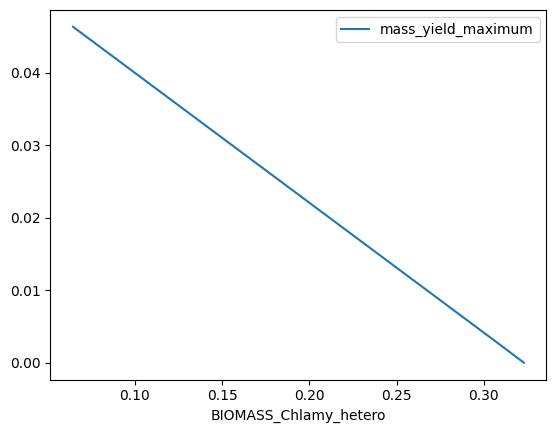

In [70]:
prod_env.plot(
    kind='line', x='BIOMASS_Chlamy_hetero', y='mass_yield_maximum');

## f)

# Exercise 2

In stress conditions, microalgae  often change  their  metabolism to fight the alterations in the environment. In these scenarios, some carbon can be secreted in the 
form  of  organic acids. Although  some  stress  conditions  can  be  replicated directly  in GSM  models,  others, such as  temperature,  pH,  salinity,  require  the addition of additional  information,  such  as  gene expression  data. The file “expression_data.tsv” contains  the  normalized  gene  expression  profile  of  C.  reinhardii in  two  conditions: control and stress. 

## 2.a. 

Integrate the  expression  data for  both  conditions  using  the  eFLUX  algorithm. 
If your metabolite is H2, use the column “Stress_h2” instead of “Stress”.  The environmental condition  for each group/metabolite is available in Table  1.


In [71]:
'''
Definimos as condições ambientais. 
No caso do nosso grupo as condições são 'microaerobic mixotrophic'

photon -2000
co2 -11.6
o2 -0.01
acetate -10
starch -1.72e-04

'''
modelo = modelo_base.copy()
modelo.objective = 'EX_h2_e'

cond_ambientais = {
        'EX_photonVis_e':(-2000    , 1000),   # condições de luz
        'EX_co2_e'      :(-11.6    , 1000),   # consumo C02
        'EX_o2_e'       :(-0.01    , 1000),   # condições de microaerobiose
        'EX_ac_e'       :(-10      , 1000),   # consumo acetato
        'SK_starch300_h':(-1.72e-4 , 1000),   # consumo amido
                    
          }

modelo

Name,iRC1080
Memory address,1e73cc7ec50
Number of metabolites,1706
Number of reactions,2191
Number of genes,1086
Number of groups,0
Objective expression,1.0*EX_h2_e - 1.0*EX_h2_e_reverse_f55e9
Compartments,"cytosol, mitochondria, chloroplast, flagellum, peroxisome/glyoxysome, nucleus, golgi apparatus, extracellular space, eyespot, thylakoid"


In [ ]:
'''# POSSIVELMENTE APAGAR POIS SERÁ ALTERADO NO EX 1
# ALTERAMOS AS CONDICOES NO MODELO

for condicao in cond_ambientais.keys():
    mudar = modelo.reactions.get_by_id(condicao)
    mudar.bounds = cond_ambientais[condicao]
    #print(mudar.id, cond_ambientais[condicao])'''

In [72]:
# Carregamento do ficheiro de dados de expressão genética

exp_gen = pd.read_csv('expression_data.tsv',sep='\t',index_col=0)

# Como não nos interessa 'Stress_12' vamos eliminar a coluna

exp_gen.drop('Stress_12h', axis = 1, inplace = True)

In [73]:
exp_gen.columns

Index(['Control_12h', 'Stress_12_h2'], dtype='object')

In [74]:
exp_gen.index.values

array(['Cre01.g000033.v5.5', 'Cre01.g000250.v5.5', 'Cre01.g000300.v5.5',
       ..., 'Cre51.g761547.v5.5', 'Cre51.g761597.v5.5',
       'Cre48.g761197.v5.5'], dtype=object)

In [75]:
# Estabelecemos as condições para a simulação usando MEWpy
simulador = get_simulator(modelo, envcond = cond_ambientais)

# Tratamos os dados para integração

genes      = exp_gen.index.values                     # Isolamos a lista de genes
ccontrolo  = ['Control_12h' ]  # Definimos as nossas condições
cstress    = ['Stress_12_h2']
controlo   = exp_gen[ccontrolo].to_numpy()         # Definimos os dados de expressão para cada uma das condições - controlo
stress     = exp_gen[cstress  ].to_numpy()         # Definimos os dados de expressão para cada uma das condições - stress

# Criamos o módulo de expressão

exp_controlo = ExpressionSet(genes, ccontrolo, controlo)
exp_stress   = ExpressionSet(genes, cstress  , stress  )

In [76]:
# Realizamos a integração dos dados para a condição controlo
# Usamos o algoritmo eFLUX

g_c = eFlux(simulador,exp_controlo)


In [77]:
g_c.find(['H2td']) 

,Flux rate
Reaction ID,
H2td,0.000459


In [ ]:
#g_c.fluxes

In [78]:
# Realizamos a integração dos dados para a condição de stress
# Usamos o algoritmo eFLUX

g_s = eFlux(simulador,exp_stress)

In [79]:
g_s.find(['H2td'])

,Flux rate
Reaction ID,
H2td,0.143033


## 2.b

|Controlo|Stress|
|-|-|
|4.59e-4|0.143|

Atendendo aos resultados blablabla a C. reinhcoisas produz mais em situações de stress.

|Resultados 1b|Controlo|Stress|
|-|-|-|
|4.274|0.000459|0.143|




# Exercise 3

## 3.a

In [82]:
# Fazemos uma cópia do modelo "intacto" , não indica pelo que não vou adaptar às condições microaerobic mixotrophic

modelo_3a = modelo_base.copy()
# modelo_3a.objective = 'BIOMASS_Chlamy_mixo'


In [93]:
# Genes essenciais

genes_essenciais = cobra.flux_analysis.find_essential_genes(modelo_3a)

In [95]:
for gene in genes_essenciais:
    print(gene.id)

CRv4_Au5_s2_g8400_t1
CRv4_Au5_s17_g7160_t1
CRv4_Au5_s1_g2318_t1
CRv4_Au5_s1_g1496_t1
CRv4_Au5_s12_g2872_t1
CRv4_Au5_s12_g3984_t1
CRv4_Au5_s10_g320_t1
CRv4_Au5_s65_g13659_t1
CRv4_Au5_s14_g5467_t1
CRv4_Au5_s1_g1126_t1
CRv4_Au5_s7_g14558_t1
CRv4_Au5_s3_g10351_t1
CRv4_Au5_s3_g11293_t1
CRv4_Au5_s1_g1986_t1
CRv4_Au5_s1_g1947_t1
CRv4_Au5_s12_g3844_t1
CRv4_Au5_s10_g376_t1
CRv4_Au5_s17_g7362_t1
CRv4_Au5_s12_g2763_t1
CRv4_Au5_s12_g2885_t1
CRv4_Au5_s2_g8409_t1
CRv4_Au5_s10_g233_t1
CRv4_Au5_s3_g11276_t1
CRv4_Au5_s3_g10259_t1
CRv4_Au5_s13_g4507_t1
CRv4_Au5_s3_g10751_t1
CRv4_Au5_s1_g2164_t1
CRv4_Au5_s8_g14922_t1
CRv4_Au5_s2_g8657_t1
CRv4_Au5_s8_g14841_t1
CRv4_Au5_s41_g11880_t1
CRv4_Au5_s17_g7580_t1
CRv4_Au5_s11_g2423_t1
CRv4_Au5_s8_g15066_t1
CRv4_Au5_s9_g15492_t1
CRv4_Au5_s6_g12748_t1
CRv4_Au5_s6_g13154_t1
CRv4_Au5_s13_g4608_t1
CRv4_Au5_s3_g10384_t1
CRv4_Au5_s12_g3144_t1
CRv4_Au5_s12_g3638_t1
CRv4_Au5_s7_g13718_t1
CRv4_Au5_s1_g1730_t1
CRv4_Au5_s2_g8449_t1
CRv4_Au5_s13_g5106_t1
CRv4_Au5_s12_g3267_t1


In [90]:
# Reacções essenciais
reacoes_essenciais = cobra.flux_analysis.find_essential_reactions(modelo_3a)

In [91]:
for reacao in reacoes_essenciais:
    print(reacao.id)

DHR
DGDGS1819Z160
MDRPD
ACOADAGAT1801819Z180
DGDGS1819Z1619Z
DHORDi
DGDGW3DS1819Z1637Z10Z13Z
TYRTAh
DGDGW6DS1829Z12Z1619Z
G3PAT180_1
LEUTA
HSTPT
ACRS
UDPG4E
DGDGW6DS1819Z1627Z10Z
HDH
MTRI
ACOADAGAT1801819Z1835Z9Z12Z
MI3PP
ACOADAGAT1801819Z1845Z9Z12Z15Z
2OH3K5MPPISO
PRATPP
MG2th
PAPA16018111Z
IMPC
MATm
PAPA1601819Z
DTMPK
DGDGW6DS1829Z12Z160
UNK3
ACOADAGAT18111Z18111Z180
ACP1619ZD9DS
FTHFLi
PRMICI
DUTPDP
PEDS1829Z12Z1835Z9Z12Z
ACOADAGAT1819Z1819Z180
O2t
ORPT
TRDR
FA18111Zh
ACOADAGAT16018111Z1845Z9Z12Z15Z
IPMD
SQDGS160
UMPK
ACPT1819Z18111Z
IPPMIb
SQDGS18111Z160
PAPA160h
SQDGS1819Z160
PAPA1801819Z
SQDGW3DS1839Z12Z15Z160
IPPMIa
ACOADAGAT1601819Z180
ACPT1819Z1819Z
SQDGW6DS1829Z12Z160
PAPA181_1
DM_photon298_c
ACOADAGAT1819Z1819Z1835Z9Z12Z
PAPA18111Z160h
DM_photon438_u
PAPA18111Z1819Z
DM_photon450_h
KARI
ACOADAGAT1601819Z1845Z9Z12Z15Z
PAPA1819Z160h
ACOADAGAT1819Z1819Z1845Z9Z12Z15Z
KARI_23dhmp
AGPAT160h
ETHAK
ATAMh
DM_photon646_h
PRAI
PSCIT
ETHAPT1801819Z
DM_photon673_u
HP
TM18111Z1819Z
TM1819Z

## 3.b 

Using gene knockout  optimization  strategies, identify  sets  of  solutions  to  improve 
the  production  of  the  compound.  Through  the  optimization  process  account  for the 
BCPY and WYIELD to evaluate the solutions.